In [30]:
import numpy as np
import prtools as pr 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Excercise 6.18

In [31]:
# help(pr.featself) -- feature forward selection
# help(pr.featselb) -- feature backward selection
help(pr.featseli) # -- Individual Feature Selector

data = pr.gendatd(100, dim=10)
print((+data)[1])

Help on function featseli in module prtools.prtools:

featseli(task=None, x=None, w=None)
    Individual Feature Selector
    
           w = featseli(A, (K,CRIT))
    
    Individual feature selection of K features using the dataset A. The
    criterion is defined by CRIT; for more information for possible
    criteria, see FEATEVAL.
    
    Example:
    a = gendat()
    w = featseli(a, (4,ldc()))

[-3.39383089 -5.23584017 -4.34842014  2.77416179  6.27183765  4.50833586
 -4.6158968   7.57677173  5.26955759  0.17388692]


In [32]:
wF = pr.featself(data, (2, 'maha-s'))
wB = pr.featselb(data, (2, 'maha-s'))
wI = pr.featseli(data, (2, 'maha-s'))
dataF = wF(data)
dataB = wB(data)
dataI = wI(data)

print((+dataF)[1], ': feature 0 and 1', '\n')
print((+dataB)[1], ': feature 8 and 9', '\n')
print((+dataI)[1], ': feature 0 and 1', '\n')

[-3.39383089 -5.23584017] : feature 0 and 1 

[5.26955759 0.17388692] : feature 8 and 9 

[-3.39383089 -5.23584017] : feature 0 and 1 



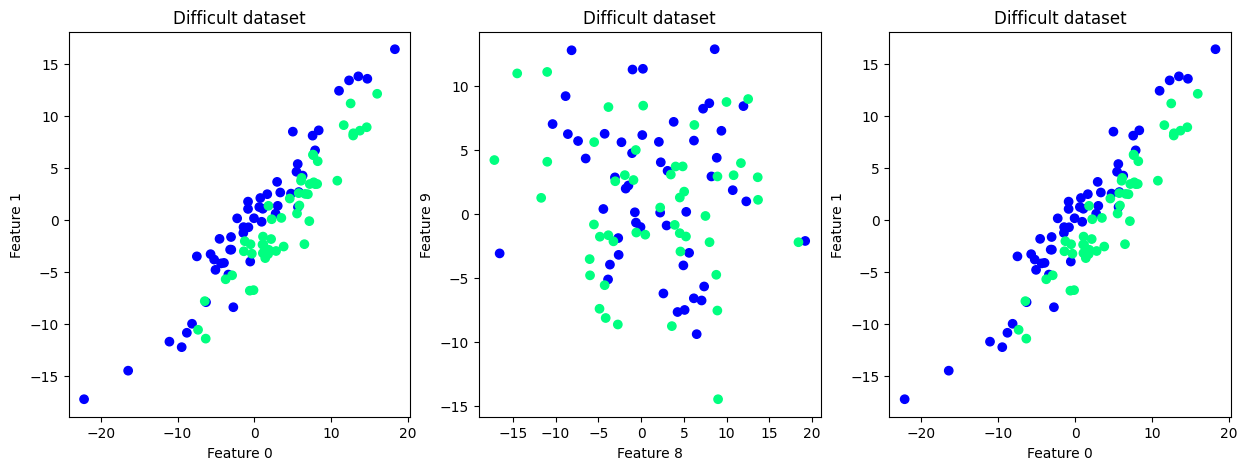

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(131)
pr.scatterd(dataF)
plt.subplot(132)
pr.scatterd(dataB)
plt.subplot(133)
pr.scatterd(dataI)

featself and featseli both select the optimal one, while featselb does not.

### Excercise 6.19

In [34]:

from itertools import combinations
from scipy.special import comb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

data = pr.read_mat("diabetes")
print("data shape: ", data.shape)



x_train, x_test, y_train, y_test = train_test_split(+data, data.nlab(), test_size=0.5, random_state=40)


c = list(combinations([0,1,2,3,4,5,6,7], 5))
print(c[:5])



max_acc = 0
for i in range(comb(8,5).astype(np.int)):
    train_dataset = pr.prdataset(x_train[:,list(c[i])], y_train)#
    test_dataset = pr.prdataset(x_test[:,list(c[i])], y_test)
    w = pr.knnc(train_dataset) #Change this to fisher or knn
    acc = w.eval(test_dataset)
    acc = pr.testc(acc)
    if acc > max_acc:
        max_acc = acc
        best_feat = c[i]
        
 

print("The best 5 features: ", best_feat)
print("The accuracy is ", max_acc)

data shape:  (768, 8)
[(0, 1, 2, 3, 4), (0, 1, 2, 3, 5), (0, 1, 2, 3, 6), (0, 1, 2, 3, 7), (0, 1, 2, 4, 5)]


C:\Users\amala\AppData\Local\Temp\ipykernel_57360\635941374.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for i in range(comb(8,5).astype(np.int)):


The best 5 features:  (2, 3, 4, 6, 7)
The accuracy is  0.4244791666666667


In [35]:
pr.feateval(data,pr.ldc())

0.21614583333333334

Changing  the value of random_state, you may obtain a different result.

### Excercise 6.24

error rate:  0.05


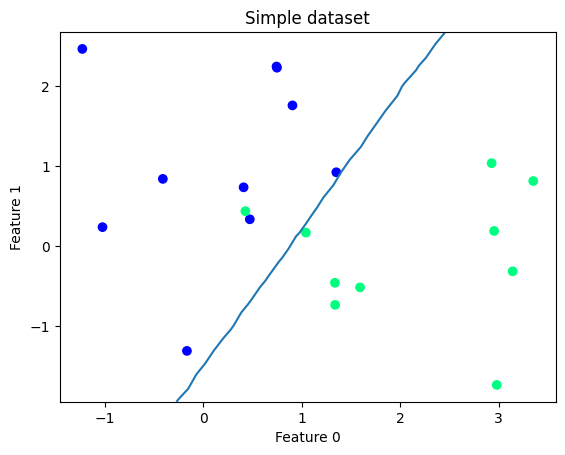

In [36]:
data = pr.gendats((10,10))
w = pr.baggingc(task=data, w=pr.knnc([], 1))
print("error rate: ", pr.testc(w.eval(data)))
pr.scatterd(data)
pr.plotc(w)

error rate:  0.3


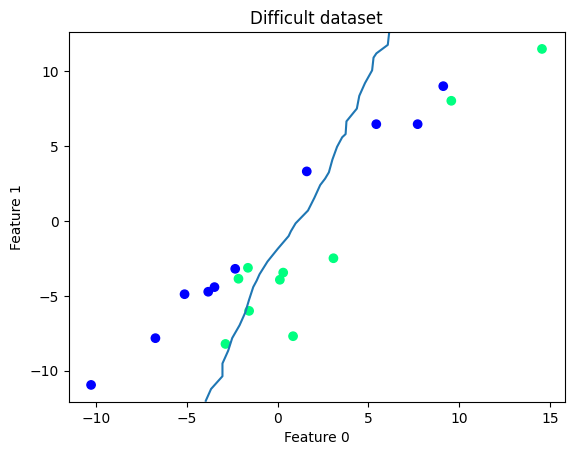

In [37]:
data = pr.gendatd((10,10))
w = pr.baggingc(task=data, w=pr.knnc([], 1))
print("error rate: ", pr.testc(w.eval(data)))
pr.scatterd(data)
pr.plotc(w)

### Excercise 6.25


In [82]:
a1 = pr.read_mat("mfeat_kar"); b1,c1 = pr.gendat(a1,0.3,seed=2)
a2 = pr.read_mat("mfeat_zer"); b2,c2 = pr.gendat(a1,0.3,seed=2)
a3 = pr.read_mat("mfeat_mor"); b3,c3 = pr.gendat(a1,0.3,seed=2)

w1 = pr.nmc(b1)*pr.classc() 
w2 = pr.nmc(b2)*pr.classc() 
w3 = pr.nmc(b3)*pr.classc()

g = pr.concatenate([c1*w1,c2*w2,c3*w3],axis=1)*pr.medianc()
print(c1*w2*pr.testc())

0.085


In [63]:
b = pr.concatenate([b1, b2, b3], axis = 1)
c = pr.concatenate([c1, c2, c3], axis = 1)

w = pr.nmc(b)*pr.classc()

print(c*w*pr.testc())

0.085


In [83]:
g = pr.concatenate([c1*w1,c2*w2,c3*w3],axis=1)*pr.medianc()
v = pr.concatenate([c1*w1,c2*w2,c3*w3],axis=1)*pr.meanc()

In [87]:
print(g*pr.testc())
help(pr.gendat)

0.085
Help on function gendat in module prtools.dataset:

gendat(x, n, seed=None)



The reason we are using I and J is to ensure that features come from the same object during testing, f we would have applied gendat separately to all data sets, there would be no guarantee
that the same objects are in all training sets or test sets, respectively.

### Excercise 6.26

In [137]:
a = pr.gendath()
w1 = pr.nmc()
w2 = pr.ldc()
p1 = a*w1*pr.classc()
p2 = a*w2*pr.classc()


p = pr.concatenate([p1,p2], axis=1)

[prmapping(Nearest mean+Classc,trained), prmapping(LDA+Classc,trained)]


### Excercise 6.27

Help on function gendath in module prtools.prtools:

gendath(n=(50, 50))
    Generation of Highleyman classes
    
        A = gendath(N)
    
    Generation of a 2-dimensional 2-class dataset A of N objects
    according to Highleyman. 
    
    The two Highleyman classes are defined by 
    1: Gauss([1 1],[1 0; 0 0.25]).
    2: Gauss([2 0],[0.01 0; 0 4]).
    Class priors are P(1) = P(2) = 0.5



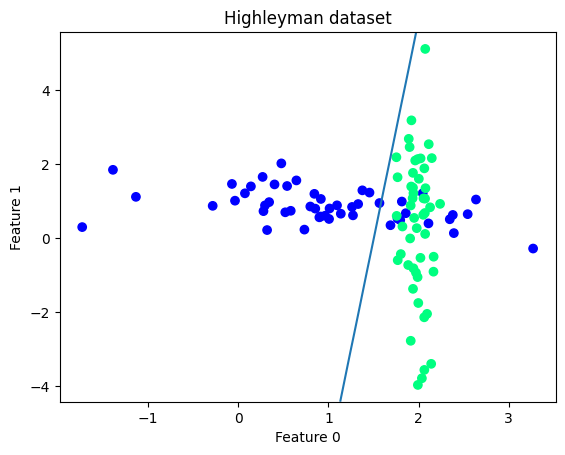

In [146]:
a = pr.gendath()

v =pr.ldc()*pr.classc()*pr.fisherc()
w3 = a*v


pr.scatterd(a)
pr.plotc(w3)


### Excercise 6.28

In [85]:
data = pr.gendatb((100,100))

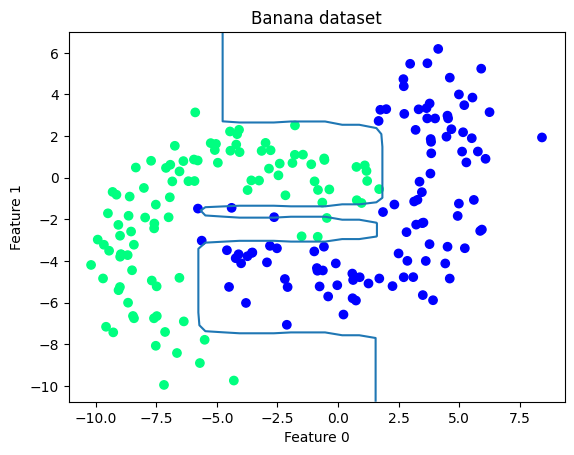

In [86]:
pr.scatterd(data)
w = pr.adaboostc(task=data, w=(pr.stumpc,1,[],0))
pr.plotc(w)

We see the decision boundary become progressively more complex.
(b) The decision boundary (once in a while) becomes overly complex and starts to fit to insignificant
details in the training data. The test error would slowly go up again with more base classifiers
after initially decreasing.